For this assignment, you will work with the eye tracker output we’ve been using for the last two
tutorials. Please write a Python code that loads the x and y coordinates of the gaze point of the
left eye and does the following:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ts,left_x,left_y=np.loadtxt('exampleEyetrackerData.tsv',usecols=[0,1,2],unpack=True,skiprows=1)

## Part-1


Converts the x and y coordinates from normalized screen units (0 to 1 along both axes)
to display visual angle (dva) relative to the centre of the screen. The height and width of
the screen of the lab computer are 30.6 cm and 54.5 cm, respectively. The screen was
placed 100 cm away from the participant when the particular data file was recorded.

### Your submissions

In [5]:
screenDist=100
screenHeight=30.6
screenWidth=54.5

In [ ]:
#convert normalised units to cm first
a = (left_x-0.5)*screenWidth
b = (left_y-0.5)*screenHeight

    #convert cm to DVA
k = 2*np.arctan(a/(2*screenDist))*(180/np.pi)
l = 2*np.arctan(b/(2*screenDist))*(180/np.pi)

In [ ]:
left_x_cm =np.array(left_x)*screenWidth
left_y_cm =np.array(left_y)*screenHeight

# 2 Step: converting centimeters relative to th
# 
# e center of the screen "as the reference point"
x_center=screenWidth/2
y_center=screenHeight/2

x_relativetocenter = left_x_cm-x_center # we get the distance from/relative to the center by substracting
y_relativetocenter = left_y_cm-y_center # the middle of the screen from the gaze position in cm 
# 3 Step: converting it to dva
""" side note: dva is angle measured in degrees - distance of a gaze point from the center also considering viewing distance """
# whole circle has 360 = 2pi (radiant), which means 180 =pi, by deviding 180/np.pi we are "getting" degrees
left_x_dva=(x_relativetocenter/screenDist) * (180/np.pi)
left_y_dva=(y_relativetocenter/screenDist)* (180/np.pi)

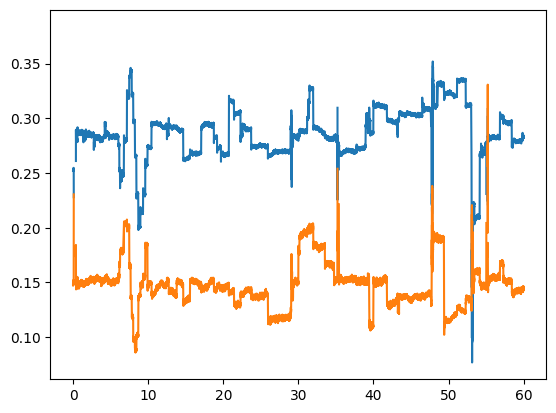

In [4]:
left_x_dva=np.arctan((54.5*left_x)/100)
left_y_dva=np.arctan((30.6*left_y)/100)

referenceTime=ts[0] 
timeaxis=(ts-referenceTime)/1e6
plt.plot(timeaxis,left_x_dva)
plt.plot(timeaxis,left_y_dva)
plt.show()


### How I would do it

In [6]:
def normToDva(X_norm, Y_norm, screenDist=100, screenHeight=30.6, screenWidth=54.5):

    #convert normalised units to cm 
    X_cm = (X_norm-0.5)*screenWidth
    Y_cm = (Y_norm-0.5)*screenHeight

    #convert cm to dva, in radians
    X_dva_radians=np.arctan(X_cm/screenDist)
    Y_dva_radians = np.arctan(Y_cm/screenDist)

    #convert radians to degrees
    X_dva=np.degrees(X_dva_radians)
    Y_dva=np.degrees(Y_dva_radians)

    return X_dva,Y_dva

In [7]:
left_x_dva,left_y_dva=normToDva(left_x,left_y)
timeaxis=(ts-ts[0])/1e6

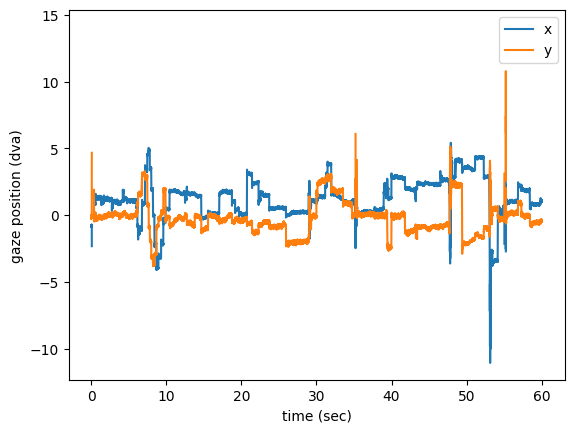

In [8]:
plt.plot(timeaxis,left_x_dva,label='x')
plt.plot(timeaxis,left_y_dva,label='y')
plt.ylabel("gaze position (dva)")
plt.xlabel("time (sec)")
plt.legend()
plt.show()

## Part - 2

2. Calculate and print out the mean, median, and standard deviation of the gaze positions,
again in units of dva

In [10]:
#what can we improve here?


xMean = np.nanmean(left_x_dva)
yMean = np.nanmean(left_y_dva)
print("mean of x",xMean)
print(yMean)

#median
xMed = np.nanmedian(left_x_dva)
yMed = np.nanmedian(left_y_dva)
print(xMed)
print(yMed)

#standart deviation
xStd = np.nanstd(left_x_dva)
yStd = np.nanstd(left_y_dva)
print(xStd)
print(yStd)


mean of x 1.2946424337701719
-0.24710878062308758
1.2355446872340288
-0.22883128383948811
1.4695555059320926
1.1843455193312566


## Part-3

3. Calculate and print out the maximum distance of the gaze positions from the centre of
the screen (again in dva).

### Your submissions

In [ ]:
xMax = max(abs(left_x_dva))
yMax = max(abs(left_y_dva))
print(xMax)
print(yMax)

In [ ]:
max_dist_x = np.nanmax(left_x_dva)
max_dist_y = np.nanmax(left_y_dva)

min_dist_x = np.nanmin(left_x_dva)
min_dist_y = np.nanmin(left_y_dva)

if (max_dist_x > -min_dist_x): #return the highest absolute value of distance on x axis
    print("maximum distance of gaze position:", max_dist_x, "dva (x)")
elif (max_dist_x < -min_dist_x):
    print("maximum distance of gaze position:", min_dist_x, "dva (x)")


if (max_dist_y > -min_dist_y): #return the highest absolute value of distance on y axis
    print("maximum distance of gaze position:", max_dist_y, "dva (y)")
elif (max_dist_y < -min_dist_y):
    print("maximum distance of gaze position:", min_dist_y, "dva (y)")

In [15]:
import time
timeStart=time.time()

max_distance_dva = 0
for num in range(len(ts)):
    distance_dva = np.sqrt(left_x_dva[num]**2 + left_y_dva[num]**2)
    if(distance_dva > max_distance_dva):
        max_distance_dva = distance_dva
print(f"Max. distance of gaze position from screen center: {max_distance_dva:.5f} dva")

timeTaken=time.time()-timeStart
print("Time taken to compute: %.3f ms"%(timeTaken))


Max. distance of gaze position from screen center: 15.34235 dva
Time taken to compute: 0.253 ms


### How I would do it

In [17]:
import time
timeStart=time.time()

distance_dva=np.sqrt(left_x_dva**2 + left_y_dva**2)
max_distance_dva=np.nanmax(distance_dva)
print(f"Max. distance of gaze position from screen center: {max_distance_dva:.2f} dva")

timeTaken=time.time()-timeStart
print("Time taken to compute: %.3f ms"%(timeTaken))


Max. distance of gaze position from screen center: 15.34 dva
Time taken to compute: 0.004 ms


## Part-4

4. Plot as a function of time in seconds, the distance of the gaze point (in dva, from the
centre of the screen).

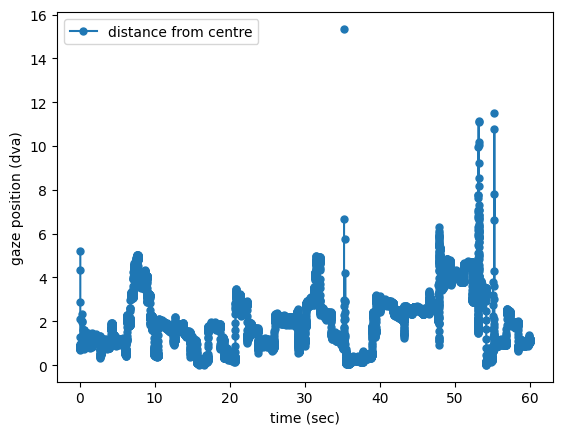

In [18]:
#plt.plot(timeaxis,left_x_dva,label='x')
#plt.plot(timeaxis,left_y_dva,label='y')
plt.plot(timeaxis,distance_dva,label='distance from centre',marker='o',ms=5)
plt.ylabel("gaze position (dva)")
plt.xlabel("time (sec)")
plt.legend(loc='upper left')
plt.show()

## Part-5

5. As you would see, there are instances where the eyes move very quickly. These are saccades, of course. Can you write a code that finds the time instance of the fastest change in eye positions? Print out the time instance along with by how much, in dva, the eyes move at that instance.

In [ ]:
velocity=np.sqrt(np.diff(left_x_dva)**2+np.diff(left_y_dva)**2)/(timeaxis[1]-timeaxis[0])

In [20]:
np.diff([1,20,3,4,5])

array([ 19, -17,   1,   1])

In [22]:
maxIndex=np.nanargmax(velocity)
maxVelocity=velocity[maxIndex]
maxTime=timeaxis[maxIndex]

print("Maximum velocity of %.2f deg/sec occurs at t=%.3f sec"%(maxVelocity,maxTime))

Maximum velocity of 3881.68 deg/sec occurs at t=55.209 sec


In [ ]:
print(len(velocity))
print(len(timeaxis))

In [ ]:
plt.plot(timeaxis[1:],velocity)
#plt.ylim(-800,800)
plt.ylabel("velocity (deg/sec)")
plt.xlabel("time (seconds)")
plt.show()